# Simple Fully-Connected Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras

# List available datasets


In [2]:
# !pip install importlib-resources
# !pip install tensorflow-datasets
import tensorflow_datasets as tfds

# List available datasets
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'booksum',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'cs_restaurants',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adr

In [3]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split = ['train', 'test'],
    shuffle_files=True,
    data_dir = 'data/',
    as_supervised=True,
    with_info=True,
)

# print(ds_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling data\mnist\3.0.1.incomplete7DQA4W\mnist-train.tfrecord*...:   0%|          | 0/60000 [00:00<?, ? exa…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling data\mnist\3.0.1.incomplete7DQA4W\mnist-test.tfrecord*...:   0%|          | 0/10000 [00:00<?, ? exam…

Dataset mnist downloaded and prepared to data/mnist\3.0.1. Subsequent calls will reuse this data.


# Visualization

In [4]:
sample = ds_train.take(6)  # Only take a sample

for example in sample:
    image, label = example[0], example[1]
    print(label.numpy())

4
0
1
7
8
1


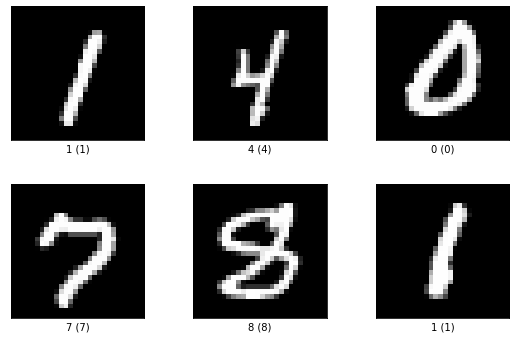

In [5]:
fig = tfds.show_examples(sample, ds_info)

In [6]:
tfds.as_dataframe(ds_train.take(5), ds_info)

,image,label
0,,4
1,,1
2,,0
3,,7
4,,8


# Keras Pipeline
## Train Pipeline

In [7]:
def normalization(image, label):
    return tf.cast(image, tf.float32) / 255., label

def invert(image, label):
        return (tf.cast(image, tf.float32) * -1.0) + 1.0, label


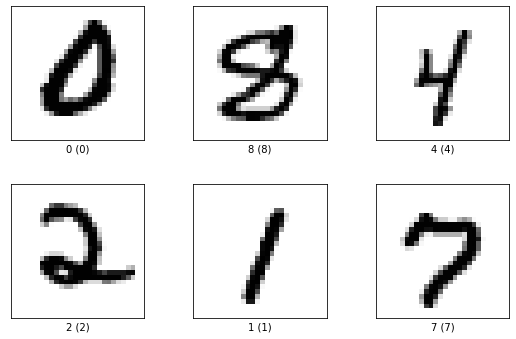

In [8]:
ds_train = ds_train.map(invert, num_parallel_calls=tf.data.AUTOTUNE)

sample = ds_train.take(6)  # Only take a sample
fig = tfds.show_examples(sample, ds_info)

In [9]:
ds_train = ds_train.map(normalization, num_parallel_calls=tf.data.AUTOTUNE)

### Performance Tips

In [10]:
# Cache it before shuffling for a better performance
ds_train = ds_train.cache()

# For randomness
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

# Get unique batches at each epoch.
ds_train = ds_train.batch(128)

# It is good practice to end the pipeline by prefetching for performance.
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

## Test Pipeline

In [11]:
ds_test = ds_test.map(invert, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(normalization, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

## Create Simple Model

In [12]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = [tf.keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(
    ds_train,
    epochs=50,
    validation_data=ds_test,
    verbose = False
)

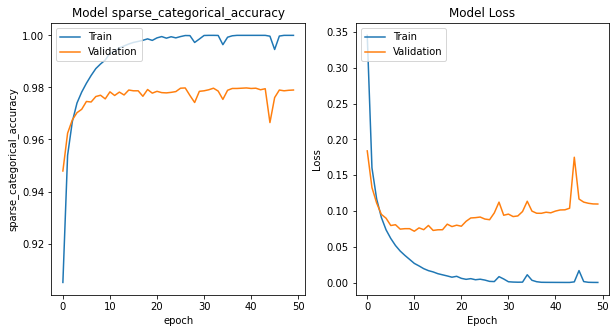

In [13]:
from utils import plot_history

plot_history(history)

In [14]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

In [15]:
history.history['val_sparse_categorical_accuracy'][-1]

0.9789999723434448

# Serializing Model

In [36]:
# model.save('../models/simple_mnist_model.h5')
model.save('../models/simple_mnist_model')

INFO:tensorflow:Assets written to: ../models/simple_mnist_model\assets


INFO:tensorflow:Assets written to: ../models/simple_mnist_model\assets


## Load Model

In [37]:
# reconstructed_model = tf.keras.models.load_model("../models/simple_mnist_model.h5")
reconstructed_model = tf.keras.models.load_model("../models/simple_mnist_model")

In [38]:
reconstructed_model.evaluate(ds_test)

79/79 [==============================] - 0s 1ms/step - loss: 0.1098 - sparse_categorical_accuracy: 0.9790


[0.1098049208521843, 0.9789999723434448]

# Keras to ONNX

In [39]:
# !pip install tf2onnx onnx onnxruntime
!python -m tf2onnx.convert --saved-model "../models/simple_mnist_model" --output "../models/simple_mnist_model.onnx"

c:\ProgramData\Anaconda3\envs\PhD\lib\runpy.py:127: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-06-11 17:21:38,368 - WARNING - '--tag' not specified for saved_model. Using --tag serve
2022-06-11 17:21:38,500 - INFO - Signatures found in model: [serving_default].
2022-06-11 17:21:38,500 - WARNING - '--signature_def' not specified, using first signature: serving_default
2022-06-11 17:21:38,500 - INFO - Output names: ['dense_1']
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-06-11 17:21:38,644 - WARNING - From c:\ProgramData\Anaconda3\envs\PhD\lib\site-packages\tf2onnx\tf_loader.py:711: extract_sub_graph (from tensorflow.python.framework.graph_util_impl) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
2022-06-11